### Import thư viện

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import random
import os
import cv2

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

### Đọc dữ liệu

In [4]:
path= 'D:\\study\\machine_learning\\classification_fish\\data\\data_raw\\Fish_Dataset'
# path = "D:\\study-hk2\\ML\\ML\\classification_fish\\data\\data_raw\\Fish_Dataset" # đường dẫn đến thư mục chứa dữ liệu
classes = [i for i in os.listdir(path) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [5]:
data = [] # mảng chứa dữ liệu
folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder, folder)
    for i in range(1, 1001):
        img_path = os.path.join(folder_path, f"{str(i).zfill(5)}.png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        data.append([img, folder])

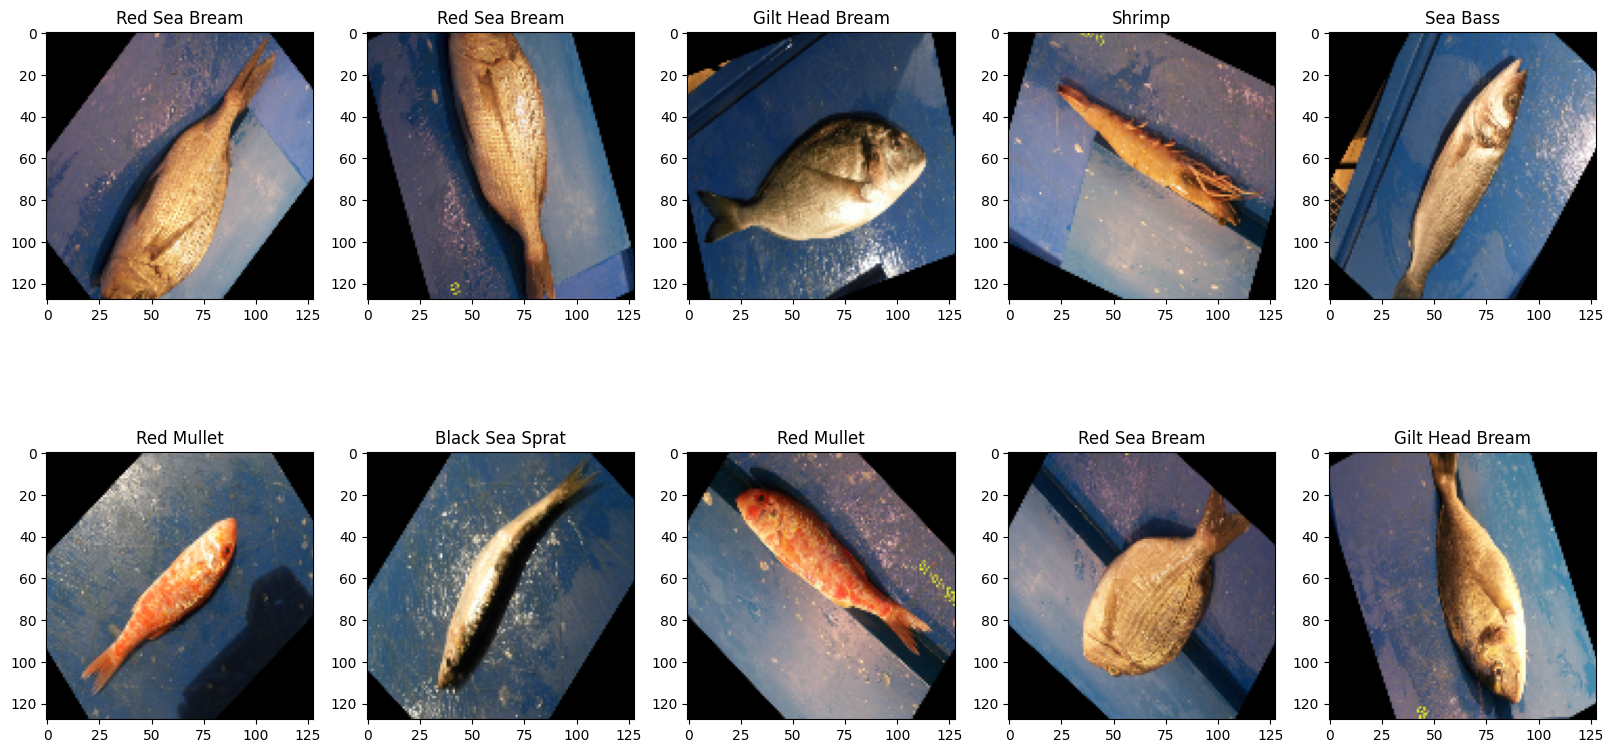

In [6]:
# hiện thị một vài ảnh và nhãn tương ứng
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    j = np.random.randint(0, 8990)
    plt.imshow(data[j+i][0])
    plt.title(data[j+i][1])

In [7]:
# shuffle dữ liệu
random.seed(42)
random.shuffle(data)

In [8]:
# tạo image và label từ data
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)

In [9]:
# chuấn hóa label thành dạng số
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [10]:
# chuyển images thành numpy array và chuẩn hóa về khoảng [0, 1]
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(9000, 128, 128, 3)

In [11]:
# duỗi ảnh thành vector
images = images.reshape(images.shape[0], -1) # 9000 ảnh, mỗi ảnh có 128x128x3 = 49,152 pixel

### Xác định số cụm phù hợp với dữ liệu

#### Phương pháp Elbow

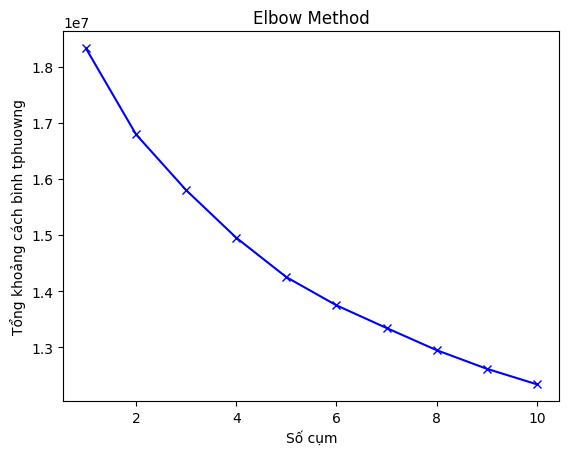

In [ ]:
warnings.filterwarnings("ignore")

# Khởi tạo một mảng lưu distortion cho mỗi số lượng cụm
distortions = []

# Thử các số lượng cụm từ 1 đến k_max
k_max = 10
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(images)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.plot(range(1, k_max+1), distortions, 'bx-')
plt.xlabel('Số cụm')
plt.ylabel('Tổng khoảng cách bình tphuowng')
plt.title('Elbow Method')
plt.show()

#### Phương pháp Silhouette

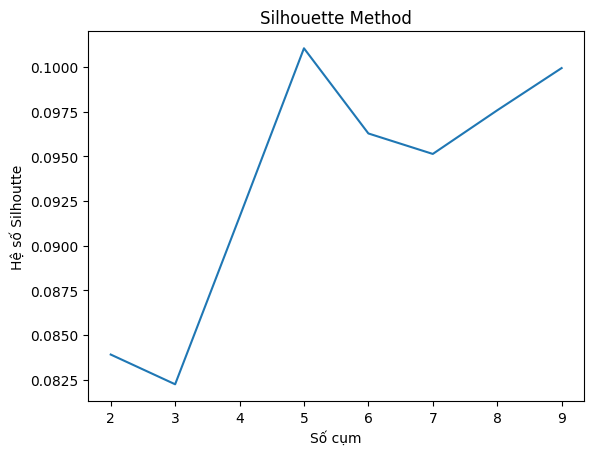

In [ ]:
warnings.filterwarnings("ignore")

scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(images)
    scores.append(silhouette_score(images, kmeans.labels_))

plt.plot(range(2, 10), scores)
plt.xlabel('Số cụm')
plt.ylabel('Hệ số Silhoutte')
plt.title('Silhouette Method')
plt.show()

### Thực hiện phân cụm

In [22]:
kmeans = KMeans(n_clusters=9, n_init=10)
clusters = kmeans.fit_predict(images)
kmeans.cluster_centers_.shape

(9, 49152)

In [23]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[15, 27, 5, 4, 7, 3, 8, 0, 25]

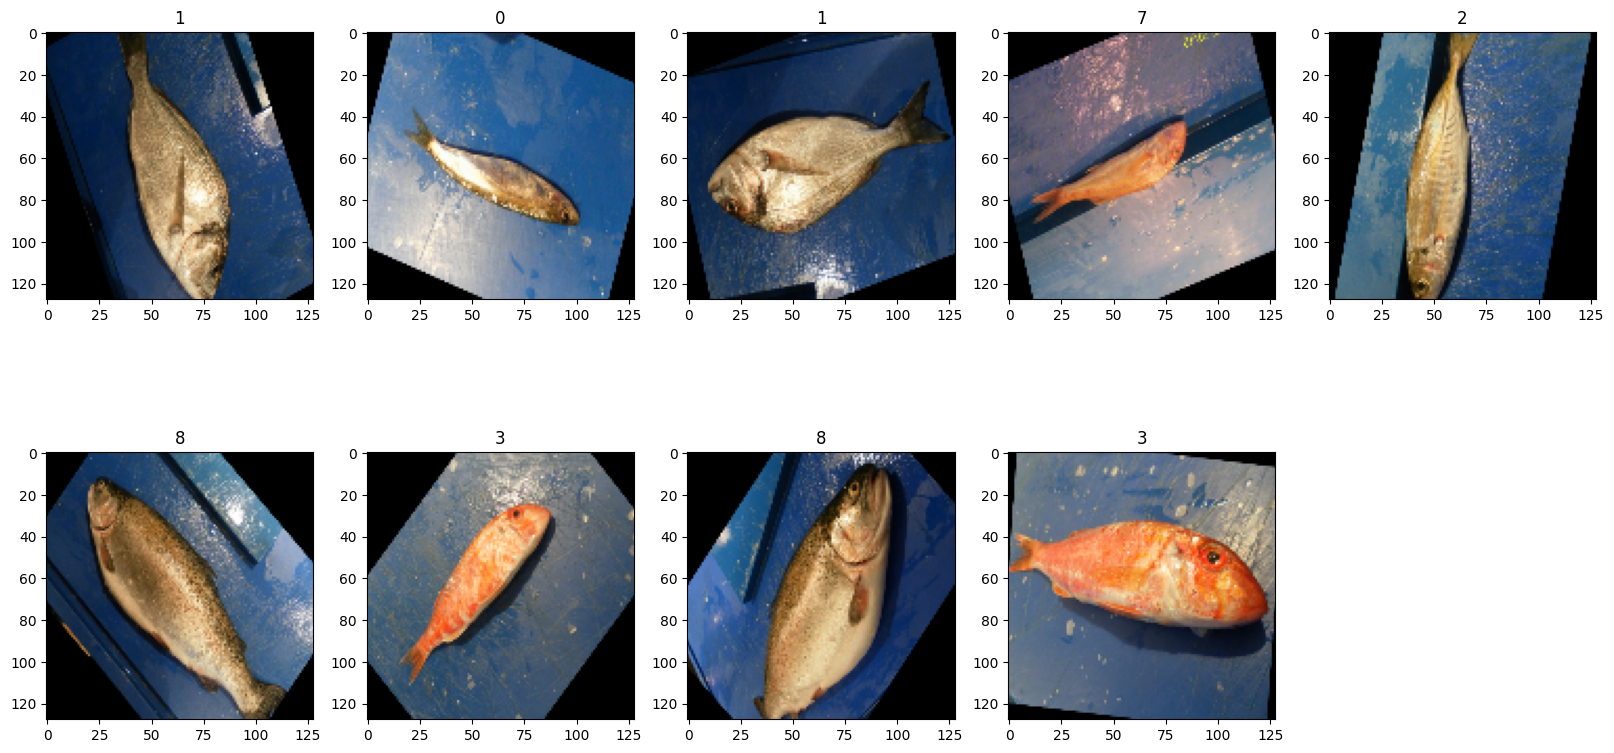

In [24]:
# hiện thị các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

### In 20 ảnh gần cụm nhất

C:\Users\vannt\AppData\Local\Temp\ipykernel_18512\2855203818.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, images_per_row, i+1)


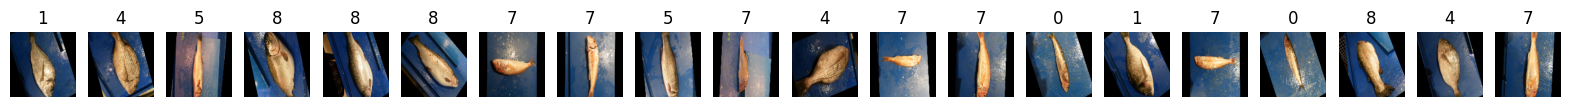

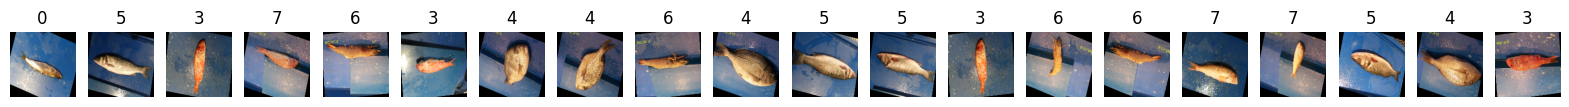

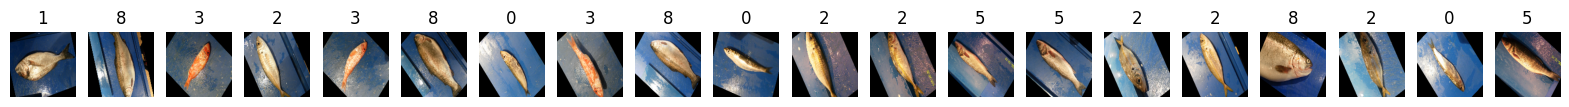

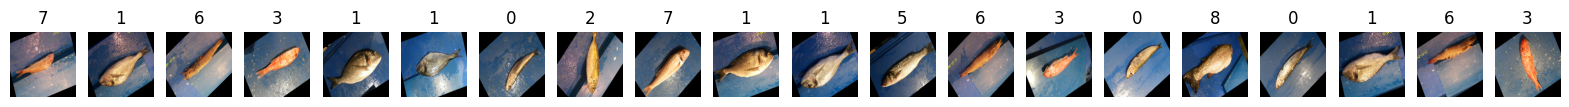

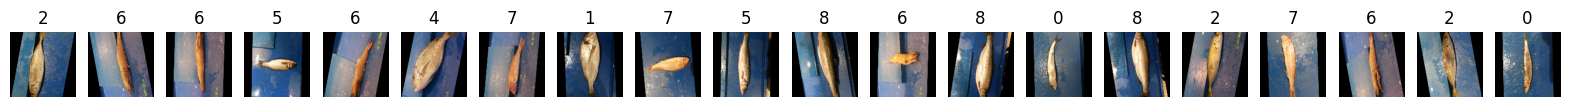

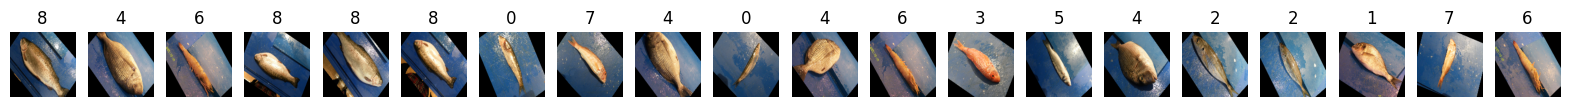

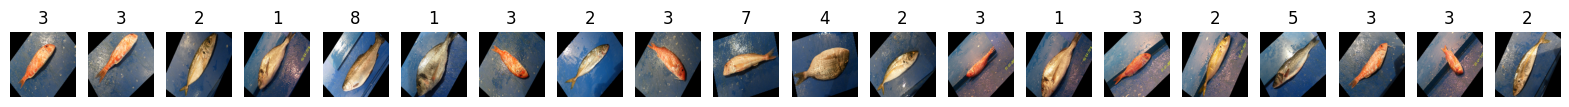

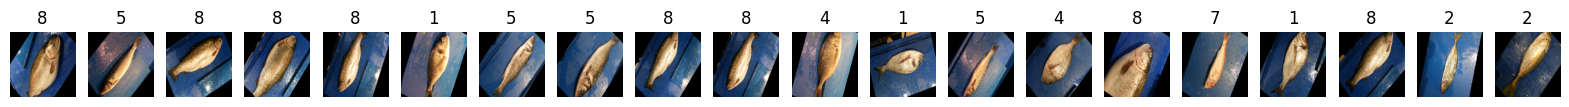

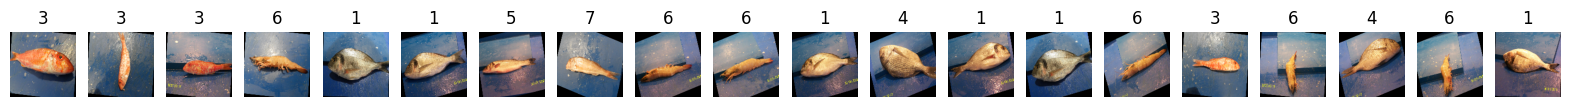

In [25]:
import matplotlib.pyplot as plt
# tâm cụm
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Vẽ tậm cụm và các cụm gần nhất
    plt.figure(figsize=(20, 1))

    # Vẽ ảnh làm tâm cụm
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Nhận chỉ số của tâm cụm
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Vẽ các ảnh trong mỗi cụm
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

### In 20 ảnh xa cụm nhất

C:\Users\vannt\AppData\Local\Temp\ipykernel_18512\209547918.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, images_per_row, i+1)


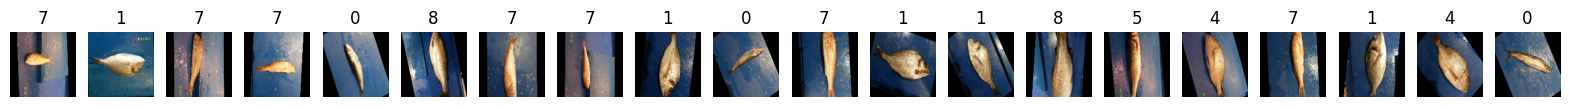

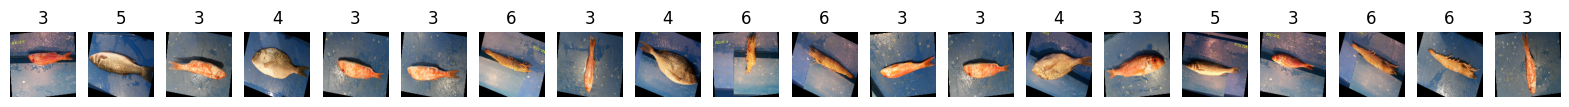

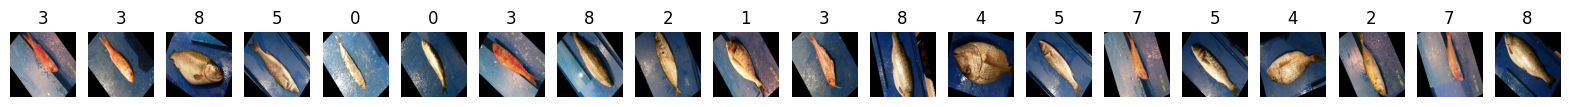

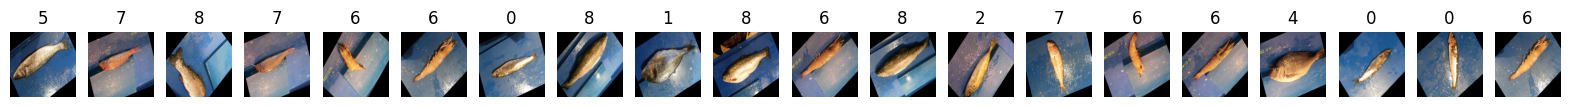

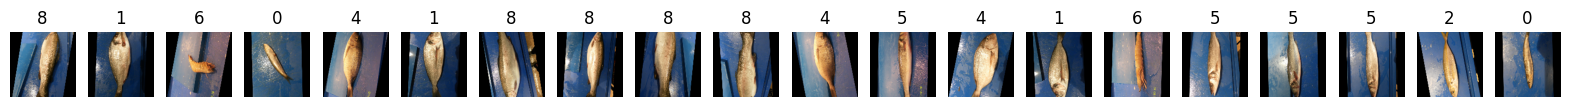

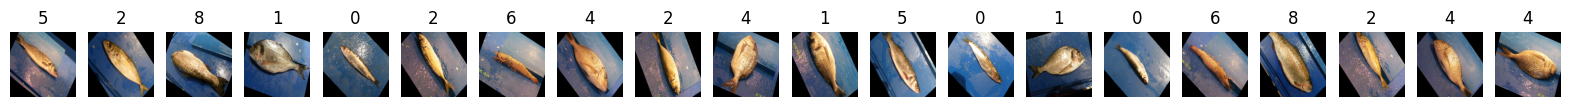

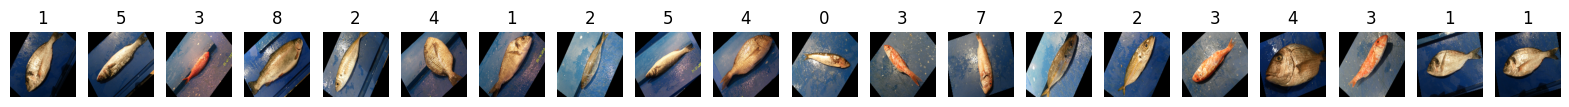

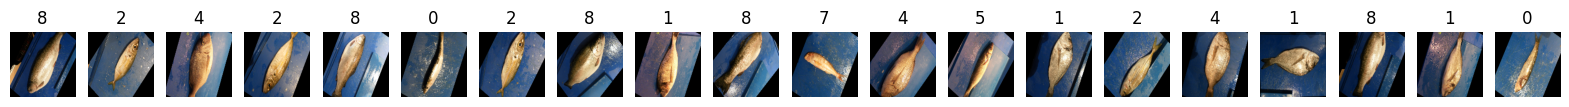

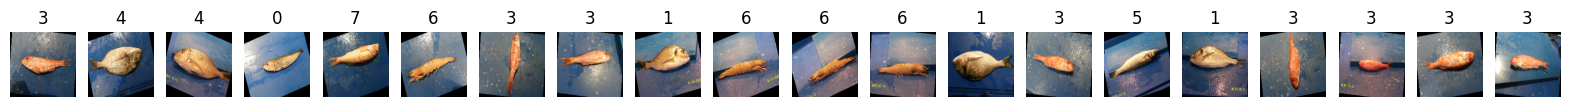

In [26]:
import matplotlib.pyplot as plt

cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20


for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Vẽ tậm cụm và các cụm gần nhất
    plt.figure(figsize=(20, 1))

    # Vẽ ảnh làm tâm cụm
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Lấy chỉ số tâm cụm
    cluster_indices = np.where(clusters == cluster_id)[0]

    # vẽ các ảnh tương ứng với mỗi cụm
    for i, img_idx in enumerate(cluster_indices[-images_per_row:]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

## Hiển thị phân cụm dưới dạng

C:\Users\vannt\AppData\Local\Temp\ipykernel_18512\487683371.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter2 = ax2.scatter(images[ :,0], images[:, 1], c=clusters[:], cmap=plt.cm.get_cmap('jet', 9), alpha=0.7)


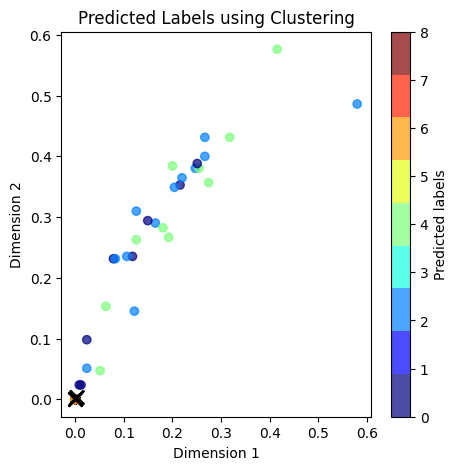

In [28]:
import matplotlib.pyplot as plt

# Dữ liệu 2D (images)
# Nhãn dự đoán từ thuật toán gom cụm (clusters)
# Tọa độ tâm cụm (cluster_centers)

# Tạo figure và các trục subplot
fig, ax2 = plt.subplots(figsize=(5, 5))

# Biểu đồ scatter plot cho dữ liệu 2D
scatter2 = ax2.scatter(images[ :,0], images[:, 1], c=clusters[:], cmap=plt.cm.get_cmap('jet', 9), alpha=0.7)
ax2.set_title('Predicted Labels using Clustering')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
colorbar2 = fig.colorbar(scatter2, ax=ax2)
colorbar2.set_label('Predicted labels')

# Vẽ các điểm tâm cụm
for center in cluster_centers:
    x, y = center[0], center[1]
    plt.scatter(x, y, color='black', marker='x', s=100)

# Hiển thị biểu đồ
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

C:\Users\duyen\AppData\Local\Temp\ipykernel_15900\3182667783.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(images[:, 0], images[:, 1], lw=0, s=40, c=palette[labels.astype(np.int)])


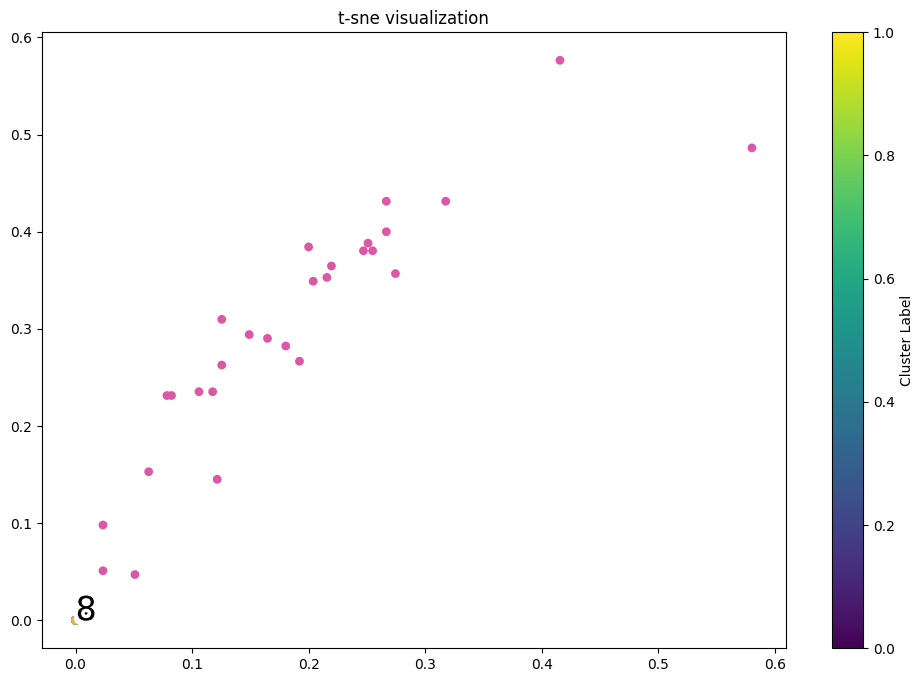

In [ ]:
# Lựa chọn màu sắc
num_classes = len(np.unique(labels))
palette = np.array(sns.color_palette("hls", num_classes))

# Vẽ biểu đồ scatter
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot()
sc = ax.scatter(images[:, 0], images[:, 1], lw=0, s=40, c=palette[labels.astype(np.int)])

# Thêm nhãn cho mỗi cluster
txts = []
for i in range(num_classes):
    # Vẽ text tên cụm tại trung vị của mỗi cụm
    xtext = np.median(images[labels == i, :], axis=0)[0]
    ytext = np.median(images[labels == i, :], axis=0)[1]
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=5, foreground="w"),
        PathEffects.Normal()])
    txts.append(txt)

plt.title('Visualization')

# In cột màu
colorbar = plt.colorbar(sc)
colorbar.set_label('Cluster Label')

plt.show()